# Boxplot ML performance

In [40]:
import pandas as pd
from pathlib import Path
import seaborn as sbn
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

project_root = Path().resolve().parents[1]

results_base = project_root / "output" / "ML"

In [41]:
N_age_bins = 10

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_high_low_sampling_Q.csv"),
    index_col=0,
)

results_pooled_high_low = results_pooled_high_low[
    results_pooled_high_low["Model"] == "Pooled data Test"
]
results_pooled_high_low["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_site_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_single_site_high_low_sampling_Q.csv"),
    index_col=0,
)
results_single_site_high_low = results_single_site_high_low[
    results_single_site_high_low["Model"] == "Single site Test"
]


In [42]:
# Load data random pooled AOMIC 1000brain
results_pooled_random_Q = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_random_Q_20_repetitions.csv"),
    index_col=0,
)
results_pooled_random_Q = results_pooled_random_Q[
    results_pooled_random_Q["Model"] == "Pooled data Test"
]
results_pooled_random_Q["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_random_Q = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_single_site_random_Q_20_repetitions.csv"),
    index_col=0,
)
results_single_random_Q = results_single_random_Q[
    results_single_random_Q["Model"] == "Single site Test"
]


FileNotFoundError: [Errno 2] No such file or directory: '/home/nnieto/Nico/QC_project/QC/output/ML/single_site/N_bins_10/results_10_bins_pooled_data_random_Q_20_repetitions.csv'

/tmp/ipykernel_13689/3353331059.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_results["QC_Sampling"].replace(


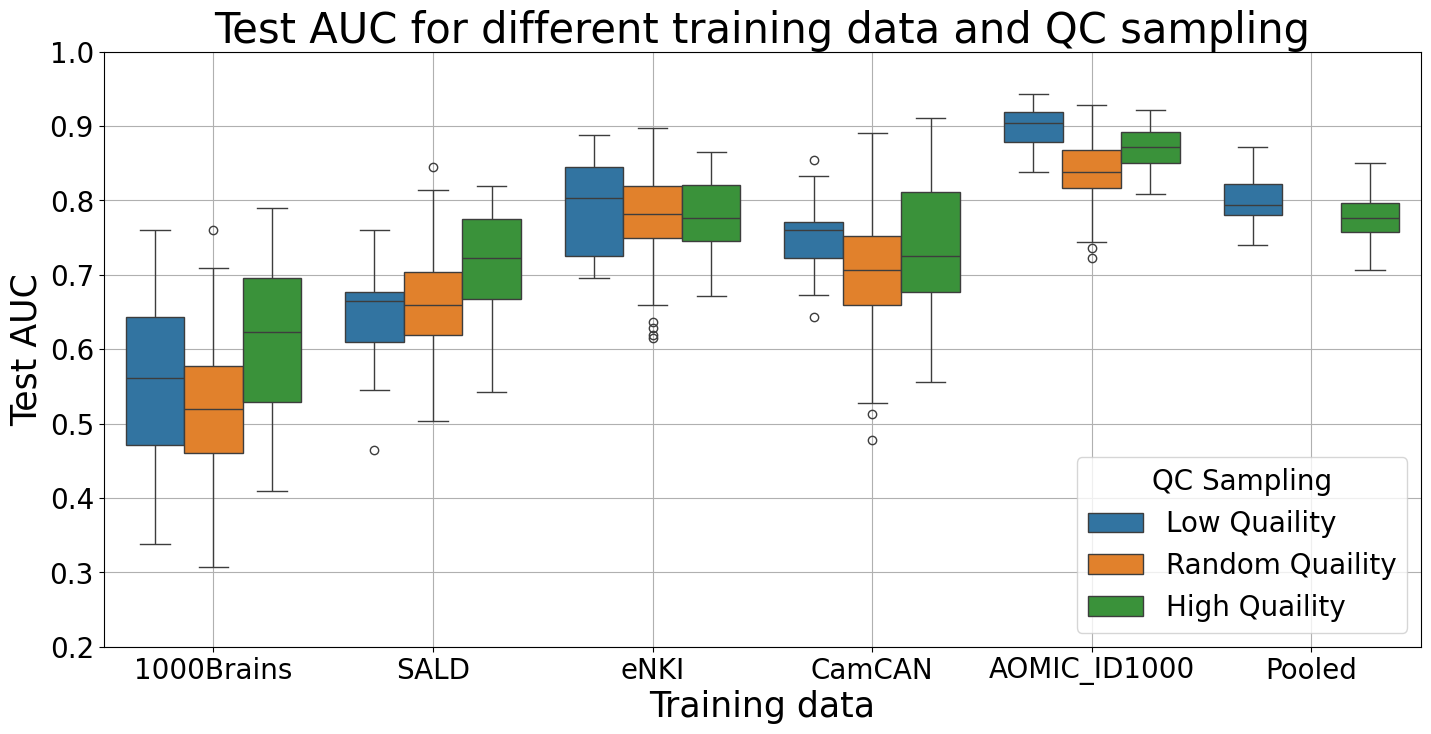

In [ ]:
combined_results = pd.concat(
    [
        results_single_site_high_low,
        results_pooled_high_low,
        results_single_random_Q,
        results_pooled_random_Q,
    ]
)
order = ["Low Quaility", "Random Quaility", "High Quaility"]
site_list = ["1000Brains", "SALD", "eNKI", "CamCAN", "AOMIC_ID1000", "Pooled"]
metric_to_plot = "AUC"
combined_results["QC_Sampling"].replace(
    {
        "low_Q": "Low Quaility",
        "high_Q": "High Quaility",
        "random_Q": "Random Quaility",
    },
    inplace=True,
)
combined_results.rename(columns={"QC_Sampling": "QC Sampling"}, inplace=True)
plt.figure(figsize=(17, 17))
plt.subplot(2, 1, 1)

sbn.boxplot(
    data=combined_results,
    x="Site",
    order=site_list,
    y=metric_to_plot,
    hue="QC Sampling",
    hue_order=order,
)
plt.grid()
plt.ylim([0.2, 1])
plt.xlabel("Training data")
plt.ylabel("Test AUC")
plt.title("Test AUC for different training data and QC sampling")
plt.show()

# 3 age bins

In [ ]:
N_age_bins = 3

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_high_low_sampling_Q.csv"),
    index_col=0,
)

results_pooled_high_low = results_pooled_high_low[
    results_pooled_high_low["Model"] == "Pooled data Test"
]
results_pooled_high_low["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_site_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_single_site_high_low_sampling_Q.csv"),
    index_col=0,
)
results_single_site_high_low = results_single_site_high_low[
    results_single_site_high_low["Model"] == "Single site Test"
]


In [ ]:
N_age_bins = 3

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_random_Q = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_random_Q_20_repetitions.csv"),
    index_col=0,
)
results_pooled_random_Q = results_pooled_random_Q[
    results_pooled_random_Q["Model"] == "Pooled data Test"
]
results_pooled_random_Q["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_random_Q = pd.read_csv(
    results_dir
    / (
        "results_"
        + str(N_age_bins)
        + "_bins_single_site_random_sampling_Q_20_repetitions.csv"
    ),
    index_col=0,
)
results_single_random_Q = results_single_random_Q[
    results_single_random_Q["Model"] == "Single site Test"
]


/tmp/ipykernel_13689/1406275186.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_results["QC_Sampling"].replace(


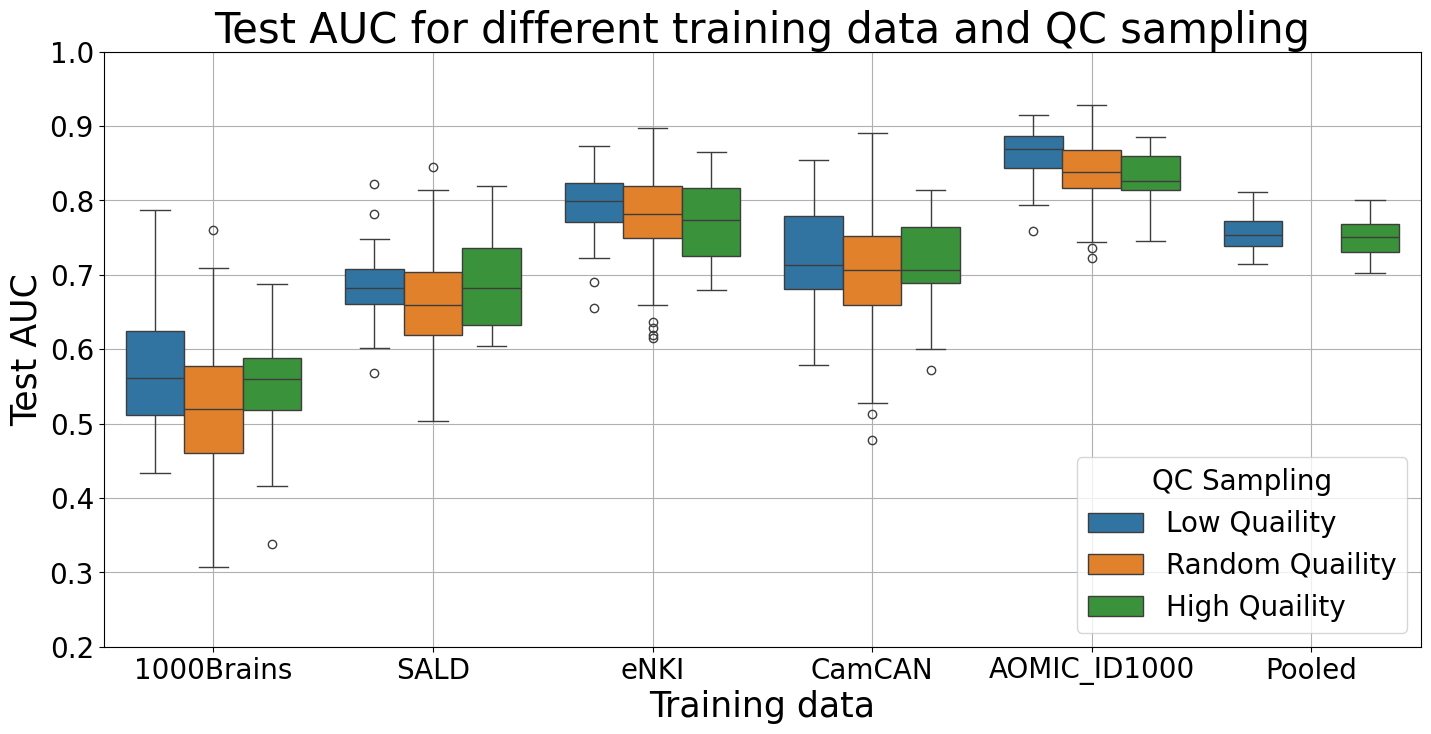

In [ ]:
combined_results = pd.concat(
    [
        results_single_site_high_low,
        results_pooled_high_low,
        results_single_random_Q,
        results_pooled_random_Q,
    ]
)
order = ["Low Quaility", "Random Quaility", "High Quaility"]
site_list = ["1000Brains", "SALD", "eNKI", "CamCAN", "AOMIC_ID1000", "Pooled"]
metric_to_plot = "AUC"
combined_results["QC_Sampling"].replace(
    {
        "low_Q": "Low Quaility",
        "high_Q": "High Quaility",
        "random_Q": "Random Quaility",
    },
    inplace=True,
)
combined_results.rename(columns={"QC_Sampling": "QC Sampling"}, inplace=True)
plt.figure(figsize=(17, 17))
plt.subplot(2, 1, 1)

sbn.boxplot(
    data=combined_results,
    x="Site",
    order=site_list,
    y=metric_to_plot,
    hue="QC Sampling",
    hue_order=order,
)
plt.grid()
plt.ylim([0.2, 1])
plt.xlabel("Training data")
plt.ylabel("Test AUC")
plt.title("Test AUC for different training data and QC sampling")
plt.show()